# Projet 2: Analyse des donn√©es de syst√®mes √©ducatifs
Dans ce projet, nous explorons les donn√©es de la Banque Mondiale pour d√©terminer les pays o√π Academy pourrait s‚Äôimplanter. Nous allons proc√©der √©tape par √©tape : chargement, nettoyage, r√©duction du p√©rim√®tre et consolidation finale des donn√©es.

## Partie 1

### √âtape 1 : Chargement des donn√©es

Nous commen√ßons par charger les cinq fichiers fournis par la Banque Mondiale.
Chaque fichier contient des informations compl√©mentaires sur les pays, les indicateurs et les m√©tadonn√©es associ√©es.

In [317]:
# Importation des biblioth√®ques
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [318]:
# Configuration pour l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Liste des fichiers √† analyser
fichiers = [
    'EdStatsCountry.csv',
    'EdStatsCountry-Series.csv', 
    'EdStatsData.csv',
    'EdStatsFootNote.csv',
    'EdStatsSeries.csv'
]

# Chargement des donn√©es
CountrySeries = pd.read_csv("EdStatsCountry-Series.csv")
Country       = pd.read_csv("EdStatsCountry.csv")
Data          = pd.read_csv("EdStatsData.csv")
FootNote      = pd.read_csv("EdStatsFootNote.csv")
Series        = pd.read_csv("EdStatsSeries.csv")

print("-" * 130)
print("Dataset EdStatsCountry-Series.csv: charg√© avec succ√®s sous le nom CountrySeries")
print("\nDataset EdStatsCountry.csv: charg√© avec succ√®s sous le nom Country")
print("\nDataset EdStatsData.csv: charg√© avec succ√®s sous le nom Data ")
print("\nDataset EdStatsFootNote.csv: charg√© avec succ√®s sous le nom FootNote")
print("\nDataset EdStatsSeries.csv: charg√© avec succ√®s sous le nom Series")
print(f"\n {len(fichiers)} fichiers charg√©s au total")
print("-" * 70)

----------------------------------------------------------------------------------------------------------------------------------
Dataset EdStatsCountry-Series.csv: charg√© avec succ√®s sous le nom CountrySeries

Dataset EdStatsCountry.csv: charg√© avec succ√®s sous le nom Country

Dataset EdStatsData.csv: charg√© avec succ√®s sous le nom Data 

Dataset EdStatsFootNote.csv: charg√© avec succ√®s sous le nom FootNote

Dataset EdStatsSeries.csv: charg√© avec succ√®s sous le nom Series

 5 fichiers charg√©s au total
----------------------------------------------------------------------


### √âtape 2 : Collecte des informations sur chaque dataset

#### 1. Dataset EdStatsCountry-Series (CountrySeries):  Permet de savoir quels indicateurs sont disponibles pour chaque pays.

Une ligne = une combinaison (pays, indicateur).

- **Nous allons analyser :**
    - La structure et le nombre de lignes/colonnes
    - Les doublons
    - Les colonnes vides ou inutiles
    - Les types de donn√©es (cat√©gorielles ou num√©riques)

In [319]:
# 1. D√©finir des lignes
print(" * Structure des donn√©es:")
print(f"      - Dimensions: {CountrySeries.shape[0]} lignes √ó {CountrySeries.shape[1]} colonnes")
print(f"      - Colonnes: {list(CountrySeries.columns[:5])}{'...' if len(CountrySeries.columns) > 5 else ''}")

# Aper√ßu des 5 premi√®res lignes
print(f"\n ‚Ä¢ Aper√ßu des donn√©es:")
display(CountrySeries.head())
        
# 2. Calcul des doublons
print(f"\n ‚Ä¢ Gestion des doublons ")
nb_doublons = CountrySeries.duplicated().sum()
print(f"      - Nombre de doublons: {nb_doublons}")
if nb_doublons > 0:
    print(f"  - Proportion de doublons: {nb_doublons/len(CountrySeries)*100:.2f}%")
            # On supprimera les doublons si n√©cessaire

#3. Calcul des valeurs manquantes
valeurs_manquantes = CountrySeries.isnull().sum()
prop_manquantes = (valeurs_manquantes / len(CountrySeries) * 100).round(2)
        
### Affichage des colonnes avec des valeurs manquantes
colonnes_avec_nan = prop_manquantes[prop_manquantes > 0]
if len(colonnes_avec_nan) > 0:
    print(" * Colonnes avec valeurs manquantes:")
    for col, prop in colonnes_avec_nan.head(10).items():
        print(f"      - {col}: {valeurs_manquantes[col]} ({prop}%)")
    if len(colonnes_avec_nan) > 10:
        print(f"      -  ... et {len(colonnes_avec_nan)-10} autres colonnes")
    else:
        print("Aucune valeur manquante d√©tect√©e")
        
# 4. Statistiques descriptives pour colonnes num√©riques
colonnes_numeriques = CountrySeries.select_dtypes(include=[np.number]).columns
if len(colonnes_numeriques) > 0:
    print(f"\n ‚Ä¢ Statistiques descritives ({len(colonnes_numeriques)} colonnes num√©riques):")
    print(CountrySeries[colonnes_numeriques].describe())
        
#5. Analyse des colonnes cat√©gorielles
colonnes_categorielles = CountrySeries.select_dtypes(include=['object']).columns
if len(colonnes_categorielles) > 0:
    print(f"\nColonnes cat√©gorielles ({len(colonnes_categorielles)} colonnes):")
    for col in colonnes_categorielles[:5]:  # Limiter √† 5 colonnes
        nb_uniques = CountrySeries[col].nunique()
        print(f" {col}: {nb_uniques} valeurs uniques")
        if nb_uniques <= 10:  # Afficher les valeurs si pas trop nombreuses
            print(f"Valeurs: {CountrySeries[col].value_counts().head(3).to_dict()}")

 * Structure des donn√©es:
      - Dimensions: 613 lignes √ó 4 colonnes
      - Colonnes: ['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3']

 ‚Ä¢ Aper√ßu des donn√©es:


CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN


 ‚Ä¢ Gestion des doublons 
      - Nombre de doublons: 0
 * Colonnes avec valeurs manquantes:
      - Unnamed: 3: 613 (100.0%)
Aucune valeur manquante d√©tect√©e

 ‚Ä¢ Statistiques descritives (1 colonnes num√©riques):
       Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

Colonnes cat√©gorielles (3 colonnes):
 CountryCode: 211 valeurs uniques
 SeriesCode: 21 valeurs uniques
 DESCRIPTION: 97 valeurs uniques


Apr√®s analyse, la colonne "Unnamed: 3" est inutilisable.

In [320]:
CountrySeries = CountrySeries.drop("Unnamed: 3", axis = 1)

#### 2.Dataset EdStatsCountry(Country)
Une ligne = un pays

- **Objectifs :**
    - Identifier les colonnes utiles (r√©gion, revenu, statut de d√©veloppement)
    - Supprimer les doublons et les lignes incompl√®tes
    - V√©rifier les types de variables

In [321]:
# 1. D√©finir des lignes
print(" * Structure des donn√©es:")
print(f"      - Dimensions: {Country.shape[0]} lignes √ó {Country.shape[1]} colonnes")
print(f"      - Colonnes: {list(Country.columns[:5])}{'...' if len(Country.columns) > 5 else ''}")

# Aper√ßu des 5 premi√®res lignes
print(f"\n * Aper√ßu des donn√©es:")
display(Country.head())
        
# 2. Calcul des doublons
print(f"\n * Gestion des doublons ")
nb_doublons = Country.duplicated().sum()
print(f"      - Nombre de doublons: {nb_doublons}")
if nb_doublons > 0:
    print(f"  - Proportion de doublons: {nb_doublons/len(Country)*100:.2f}%")
            # On supprimera les doublons si n√©cessaire

#3. Calcul des valeurs manquantes
valeurs_manquantes = Country.isnull().sum()
prop_manquantes = (valeurs_manquantes / len(Country) * 100).round(2)
        
### Affichage des colonnes avec des valeurs manquantes
colonnes_avec_nan = prop_manquantes[prop_manquantes > 0]
if len(colonnes_avec_nan) > 0:
    print(" * Colonnes avec valeurs manquantes:")
    for col, prop in colonnes_avec_nan.head(10).items():
        print(f"      - {col}: {valeurs_manquantes[col]} ({prop}%)")
    if len(colonnes_avec_nan) > 10:
        print(f"      -  ... et {len(colonnes_avec_nan)-10} autres colonnes")
    else:
        print("Aucune valeur manquante d√©tect√©e")
        
# 4. Statistiques descriptives pour colonnes num√©riques
colonnes_numeriques = Country.select_dtypes(include=[np.number]).columns
if len(colonnes_numeriques) > 0:
    print(f"\n * Statistiques descritives ({len(colonnes_numeriques)} colonnes num√©riques):")
    print(Country[colonnes_numeriques].describe())
        
#5. Analyse des colonnes cat√©gorielles
colonnes_categorielles = Country.select_dtypes(include=['object']).columns
if len(colonnes_categorielles) > 0:
    print(f"\nColonnes cat√©gorielles ({len(colonnes_categorielles)} colonnes):")
    for col in colonnes_categorielles[:5]:  # Limiter √† 5 colonnes
        nb_uniques = Country[col].nunique()
        print(f" {col}: {nb_uniques} valeurs uniques")
        if nb_uniques <= 10:  # Afficher les valeurs si pas trop nombreuses
            print(f"Valeurs: {Country[col].value_counts().head(3).to_dict()}")

 * Structure des donn√©es:
      - Dimensions: 241 lignes √ó 32 colonnes
      - Colonnes: ['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code']...

 * Aper√ßu des donn√©es:


Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   
2         Sub-Saharan Africa   Upper middle income        AO   
3      Europe & Central Asia   Upper middle income        AL   
4      Europe & Central Asia  High income: nonOECD        AD   

                         National accounts base year  \
0                                               2000   
1                                            2002/03   
2                                               2002   
3  Original chained constant price data are resca...   
4                                               1990   

   National accounts reference year                   SNA price valuation  \
0                               NaN     Value added at basic prices (VAB)   
1                               NaN     Value added at basic prices (VAB)   
2                               NaN  Value added at producer prices (VAP)   
3                            1996.0     Value added at basic prices (VAB)   
4                               NaN                                   NaN   

  Lending category Other groups  \
0              NaN          NaN   
1              IDA         HIPC   
2             IBRD          NaN   
3             IBRD          NaN   
4              NaN          NaN   

                         System of National Accounts  \
0  Country uses the 1993 System of National Accou...   
1  Country uses the 1993 System of National Accou...   
2  Country uses the 1993 System of National Accou...   
3  Country uses the 1993 System of National Accou...   
4  Country uses the 1968 System of National Accou...   

  Alternative conversion factor PPP survey year  \
0                           NaN             NaN   
1                           NaN             NaN   
2                       1991‚Äì96            2005   
3                           NaN         Rolling   
4                           NaN             NaN   

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1                                           NaN   
2  IMF Balance of Payments Manual, 6th edition.   
3  IMF Balance of Payments Manual, 6th edition.   
4                                           NaN   

  External debt Reporting status       System of trade  \
0                            NaN  Special trade system   
1                         Actual  General trade system   
2                         Actual  Special trade system   
3                         Actual  General trade system   
4                            NaN  Special trade system   

     Government Accounting concept           IMF data dissemination standard  \
0                              NaN                                       NaN   
1  Consolidated central government  General Data Dissemination System (GDDS)   
2     Budgetary central government  General Data Dissemination System (GDDS) 


 * Gestion des doublons 
      - Nombre de doublons: 0
 * Colonnes avec valeurs manquantes:
      - 2-alpha code: 3 (1.24%)
      - Currency Unit: 26 (10.79%)
      - Special Notes: 96 (39.83%)
      - Region: 27 (11.2%)
      - Income Group: 27 (11.2%)
      - WB-2 code: 1 (0.41%)
      - National accounts base year: 36 (14.94%)
      - National accounts reference year: 209 (86.72%)
      - SNA price valuation: 44 (18.26%)
      - Lending category: 97 (40.25%)
      -  ... et 18 autres colonnes

 * Statistiques descritives (4 colonnes num√©riques):
       National accounts reference year  Latest industrial data  \
count                          32.00000              107.000000   
mean                         2001.53125             2008.102804   
std                             5.24856                2.616834   
min                          1987.00000             2000.000000   
25%                          1996.75000             2007.500000   
50%                          2002.00000  

Apr√®s analyse, la colonne "Unnamed: 31" est inutilisable.

In [322]:
Country = Country.drop("Unnamed: 31", axis = 1)

#### 3.Dataset EdStatsData(Data): 
Une ligne = une mesure pour un indicateur donn√©, un pays et une ann√©e

- Ce fichier √©tant volumineux, nous devons :
    - √âtudier les colonnes d‚Äôann√©es
    - √âvaluer la couverture des donn√©es
    - Nettoyer les ann√©es non pertinentes

In [323]:
# 1. D√©finir des lignes
print(" * Structure des donn√©es:")
print(f"      - Dimensions: {Data.shape[0]} lignes √ó {Data.shape[1]} colonnes")
print(f"      - Colonnes: {list(Data.columns[:5])}{'...' if len(Data.columns) > 5 else ''}")

# Aper√ßu des 5 premi√®res lignes
print(f"\n * Aper√ßu des donn√©es:")
display(Data.head())
        
# 2. Calcul des doublons
print(f"\n * Gestion des doublons ")
nb_doublons = Data.duplicated().sum()
print(f"      - Nombre de doublons: {nb_doublons}")
if nb_doublons > 0:
    print(f"  - Proportion de doublons: {nb_doublons/len(Data)*100:.2f}%")
            # On supprimera les doublons si n√©cessaire

#3. Calcul des valeurs manquantes
valeurs_manquantes = Data.isnull().sum()
prop_manquantes = (valeurs_manquantes / len(Data) * 100).round(2)
        
### Affichage des colonnes avec des valeurs manquantes
colonnes_avec_nan = prop_manquantes[prop_manquantes > 0]
if len(colonnes_avec_nan) > 0:
    print(" * Colonnes avec valeurs manquantes:")
    for col, prop in colonnes_avec_nan.head(10).items():
        print(f"      - {col}: {valeurs_manquantes[col]} ({prop}%)")
    if len(colonnes_avec_nan) > 10:
        print(f"      -  ... et {len(colonnes_avec_nan)-10} autres colonnes")
    else:
        print("Aucune valeur manquante d√©tect√©e")
        
# 4. Statistiques descriptives pour colonnes num√©riques
colonnes_numeriques = Data.select_dtypes(include=[np.number]).columns
if len(colonnes_numeriques) > 0:
    print(f"\n * Statistiques descritives ({len(colonnes_numeriques)} colonnes num√©riques):")
    print(Data[colonnes_numeriques].describe())
        
#5. Analyse des colonnes cat√©gorielles
colonnes_categorielles = Data.select_dtypes(include=['object']).columns
if len(colonnes_categorielles) > 0:
    print(f"\nColonnes cat√©gorielles ({len(colonnes_categorielles)} colonnes):")
    for col in colonnes_categorielles[:5]:  # Limiter √† 5 colonnes
        nb_uniques = Data[col].nunique()
        print(f" {col}: {nb_uniques} valeurs uniques")
        if nb_uniques <= 10:  # Afficher les valeurs si pas trop nombreuses
            print(f"Valeurs: {Data[col].value_counts().head(3).to_dict()}")

 * Structure des donn√©es:
      - Dimensions: 886930 lignes √ó 70 colonnes
      - Colonnes: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970']...

 * Aper√ßu des donn√©es:


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975       1976  \
0        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  60.999962   

       1977      1978       1979       1980       1981       1982       1983  \
0       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
1       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
2       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
3       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
4  61.92268  62.69342  64.383186  65.617767  66.085152  66.608139  67.290451   

        1984       1985       1986      1987       1988       1989       1990  \
0        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
4  68.510094  69.033211  69.944908  71.04187  71.693779  71.699097  71.995819   

        1991       1992       1993       1994      1995       1996       1997  \
0        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
4  72.602837  70.032722  70.464821  72.645683  71.81176  73.903511  74.425201   

        1998       1999       2000       2001       2002       2003  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  75.110817  76.254318  77.245682  78.800522  80.051399  80.805389   

        2004       2005       2006       2007       2008       2009  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  81.607063  82.489487  82.685509  83.280342  84.011871  84.195961   

        2010      2011       2012      2013       2014  2015  2016  2017  \
0        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
1        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
2        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
3        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
4  85.211998  85.24514  86.101669  85.51194  85.320152   NaN   NaN   NaN   

   2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   


 * Gestion des doublons 
      - Nombre de doublons: 0
 * Colonnes avec valeurs manquantes:
      - 1970: 814642 (91.85%)
      - 1971: 851393 (95.99%)
      - 1972: 851311 (95.98%)
      - 1973: 851385 (95.99%)
      - 1974: 851200 (95.97%)
      - 1975: 799624 (90.16%)
      - 1976: 849447 (95.77%)
      - 1977: 849356 (95.76%)
      - 1978: 849354 (95.76%)
      - 1979: 850121 (95.85%)
      -  ... et 56 autres colonnes

 * Statistiques descritives (66 colonnes num√©riques):
               1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.65513

In [324]:
Data = Data.drop("Unnamed: 69", axis = 1)

#### 4.Dataset EdStatsFootNote(FootNote)
Notes contextuelles importantes pour interpr√©ter les donn√©es (ex: changement m√©thodologique, √©v√©nements sp√©ciaux)

In [325]:
# 1. D√©finir des lignes
print(" * Structure des donn√©es:")
print(f"      - Dimensions: {FootNote.shape[0]} lignes √ó {FootNote.shape[1]} colonnes")
print(f"      - Colonnes: {list(FootNote.columns[:5])}{'...' if len(FootNote.columns) > 5 else ''}")

# Aper√ßu des 5 premi√®res lignes
print(f"\n * Aper√ßu des donn√©es:")
display(FootNote.head())
        
# 2. Calcul des doublons
print(f"\n * Gestion des doublons ")
nb_doublons = FootNote.duplicated().sum()
print(f"      - Nombre de doublons: {nb_doublons}")
if nb_doublons > 0:
    print(f"  - Proportion de doublons: {nb_doublons/len(FootNote)*100:.2f}%")
            # On supprimera les doublons si n√©cessaire

#3. Calcul des valeurs manquantes
valeurs_manquantes = FootNote.isnull().sum()
prop_manquantes = (valeurs_manquantes / len(FootNote) * 100).round(2)
        
### Affichage des colonnes avec des valeurs manquantes
colonnes_avec_nan = prop_manquantes[prop_manquantes > 0]
if len(colonnes_avec_nan) > 0:
    print(" * Colonnes avec valeurs manquantes:")
    for col, prop in colonnes_avec_nan.head(10).items():
        print(f"      - {col}: {valeurs_manquantes[col]} ({prop}%)")
    if len(colonnes_avec_nan) > 10:
        print(f"      -  ... et {len(colonnes_avec_nan)-10} autres colonnes")
    else:
        print("Aucune valeur manquante d√©tect√©e")
        
# 4. Statistiques descriptives pour colonnes num√©riques
colonnes_numeriques = FootNote.select_dtypes(include=[np.number]).columns
if len(colonnes_numeriques) > 0:
    print(f"\n * Statistiques descritives ({len(colonnes_numeriques)} colonnes num√©riques):")
    print(FootNote[colonnes_numeriques].describe())
        
#5. Analyse des colonnes cat√©gorielles
colonnes_categorielles = FootNote.select_dtypes(include=['object']).columns
if len(colonnes_categorielles) > 0:
    print(f"\nColonnes cat√©gorielles ({len(colonnes_categorielles)} colonnes):")
    for col in colonnes_categorielles[:5]:  # Limiter √† 5 colonnes
        nb_uniques = FootNote[col].nunique()
        print(f" {col}: {nb_uniques} valeurs uniques")
        if nb_uniques <= 10:  # Afficher les valeurs si pas trop nombreuses
            print(f"Valeurs: {FootNote[col].value_counts().head(3).to_dict()}")

 * Structure des donn√©es:
      - Dimensions: 643638 lignes √ó 5 colonnes
      - Colonnes: ['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4']

 * Aper√ßu des donn√©es:


CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN


 * Gestion des doublons 
      - Nombre de doublons: 0
 * Colonnes avec valeurs manquantes:
      - Unnamed: 4: 643638 (100.0%)
Aucune valeur manquante d√©tect√©e

 * Statistiques descritives (1 colonnes num√©riques):
       Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

Colonnes cat√©gorielles (4 colonnes):
 CountryCode: 239 valeurs uniques
 SeriesCode: 1558 valeurs uniques
 Year: 56 valeurs uniques
 DESCRIPTION: 9102 valeurs uniques


In [326]:
FootNote = FootNote.drop("Unnamed: 4", axis = 1)

#### 5.Dataset EdStatsSeries(Series)
Une ligne = un indicateur

- Objectifs :
    - Identifier les cat√©gories m√©tier des indicateurs (`Topic`)
    - Supprimer ceux non pertinents pour le projet
    - Pr√©parer la s√©lection m√©tier

In [327]:
# 1. D√©finir des lignes
print(" * Structure des donn√©es:")
print(f"      - Dimensions: {Series.shape[0]} lignes √ó {Series.shape[1]} colonnes")
print(f"      - Colonnes: {list(Series.columns[:5])}{'...' if len(Series.columns) > 5 else ''}")

# Aper√ßu des 5 premi√®res lignes
print(f"\n * Aper√ßu des donn√©es:")
display(Series.head())
        
# 2. Calcul des doublons
print(f"\n * Gestion des doublons ")
nb_doublons = Series.duplicated().sum()
print(f"      - Nombre de doublons: {nb_doublons}")
if nb_doublons > 0:
    print(f"  - Proportion de doublons: {nb_doublons/len(Series)*100:.2f}%")
            # On supprimera les doublons si n√©cessaire

#3. Calcul des valeurs manquantes
valeurs_manquantes = Series.isnull().sum()
prop_manquantes = (valeurs_manquantes / len(Series) * 100).round(2)
        
### Affichage des colonnes avec des valeurs manquantes
colonnes_avec_nan = prop_manquantes[prop_manquantes > 0]
if len(colonnes_avec_nan) > 0:
    print(" * Colonnes avec valeurs manquantes:")
    for col, prop in colonnes_avec_nan.head(10).items():
        print(f"      - {col}: {valeurs_manquantes[col]} ({prop}%)")
    if len(colonnes_avec_nan) > 10:
        print(f"      -  ... et {len(colonnes_avec_nan)-10} autres colonnes")
    else:
        print("Aucune valeur manquante d√©tect√©e")
        
# 4. Statistiques descriptives pour colonnes num√©riques
colonnes_numeriques = Series.select_dtypes(include=[np.number]).columns
if len(colonnes_numeriques) > 0:
    print(f"\n * Statistiques descritives ({len(colonnes_numeriques)} colonnes num√©riques):")
    print(Series[colonnes_numeriques].describe())
        
#5. Analyse des colonnes cat√©gorielles
colonnes_categorielles = Series.select_dtypes(include=['object']).columns
if len(colonnes_categorielles) > 0:
    print(f"\nColonnes cat√©gorielles ({len(colonnes_categorielles)} colonnes):")
    for col in colonnes_categorielles[:5]:  # Limiter √† 5 colonnes
        nb_uniques = Series[col].nunique()
        print(f" {col}: {nb_uniques} valeurs uniques")
        if nb_uniques <= 10:  # Afficher les valeurs si pas trop nombreuses
            print(f"Valeurs: {Series[col].value_counts().head(3).to_dict()}")

 * Structure des donn√©es:
      - Dimensions: 3665 lignes √ó 21 colonnes
      - Colonnes: ['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition']...

 * Aper√ßu des donn√©es:


Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  \
0         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN                NaN   
2         NaN         NaN         NaN                NaN   
3         NaN         NaN         NaN                NaN   
4         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments  \
0                        NaN                         NaN              NaN   
1                        NaN                         NaN              NaN   
2                        NaN                         NaN              NaN   
3                        NaN                         NaN              NaN   
4                        NaN                         NaN              NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links  Other web links  Related indicators  License Type  \
0                  NaN              NaN                 NaN           NaN   
1                  NaN              NaN                 NaN           NaN   
2                  NaN              NaN                 NaN           NaN   
3                  NaN              NaN                 NaN           NaN   
4                  NaN              NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN


 * Gestion des doublons 
      - Nombre de doublons: 0
 * Colonnes avec valeurs manquantes:
      - Short definition: 1509 (41.17%)
      - Unit of measure: 3665 (100.0%)
      - Periodicity: 3566 (97.3%)
      - Base Period: 3351 (91.43%)
      - Other notes: 3113 (84.94%)
      - Aggregation method: 3618 (98.72%)
      - Limitations and exceptions: 3651 (99.62%)
      - Notes from original source: 3665 (100.0%)
      - General comments: 3651 (99.62%)
      - Statistical concept and methodology: 3642 (99.37%)
      -  ... et 6 autres colonnes

 * Statistiques descritives (6 colonnes num√©riques):
       Unit of measure  Notes from original source  Other web links  \
count              0.0                         0.0              0.0   
mean               NaN                         NaN              NaN   
std                NaN                         NaN              NaN   
min                NaN                         NaN              NaN   
25%                NaN                 

In [328]:
Series = Series.drop("Unnamed: 20", axis = 1)

### √âtape 3 : R√©alisation des premiers nettoyage

**A) - Nettoyage du dataset Country**
   Dans cette √©tape, nous proc√©dons √† un premier nettoyage du dataframe `Country` pour ne conserver que les pays r√©els.
- **Objectifs** :
    - Identifier les entr√©es correspondant √† de **faux pays** ou √† des **agr√©gats √©conomiques ou r√©gionaux**.
    - Supprimer ces lignes du DataFrame `Country` afin d‚Äôassurer une analyse coh√©rente sur de v√©ritables entit√©s nationales.

In [329]:
Country.shape

(241, 31)

- **√âtapes de nettoyage r√©alis√©es :**
    1. R√©cup√©ration de la liste compl√®te des entit√©s pr√©sentes dans la colonne `Short Name` pour v√©rification.
    2. D√©finition d‚Äôune liste `faux_pays` contenant les noms de regroupements non pertinents (ex : "World", "High income", "OECD members", etc.).
    3. Filtrage du DataFrame `Country` en supprimant toutes les lignes correspondant √† ces entit√©s.

In [395]:
# R√©cup√©ration de tous les pays
all_pays = []
for i in Country["Short Name"]:
    all_pays.append(i)
print(f"‚Ä¢ Nombre total d'entit√©s dans Country: {len(all_pays)}")

‚Ä¢ Nombre total d'entit√©s dans Country: 214


In [331]:
# Affectation des faux pays dans une variable faux_pays
faux_pays = [
    'East Asia & Pacific (developing only)','East Asia & Pacific (all income levels)','Europe & Central Asia (developing only)',
    'Europe & Central Asia (all income levels)', 'Heavily indebted poor countries (HIPC)','Latin America & Caribbean (developing only)', 
    'Least developed countries: UN classification','Lower middle income','Low & middle income',
    'Low income','Middle East & North Africa (all income levels)',
    'Middle East & North Africa (developing only)','OECD members',"Dem. People's Rep. Korea",
    'West Bank and Gaza','Sub-Saharan Africa (developing only)', 'Sub-Saharan Africa (all income levels)',
    'Upper middle income','Latin America & Caribbean (all income levels)','High income','Middle income','Hong Kong SAR, China','Arab World',
    'World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 
    'Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Europe & Central Asia',
    'Latin America & Caribbean','Latin America & Caribbean','South Asia', 'Latin America & Caribbean (excluding high income)',
    'Middle East & North Africa', 'Middle East & North Africa','Middle East & North Africa (excluding high income)','European Union',
    'Europe & Central Asia (excluding high income)','North America','Euro area']

print(f"‚Ä¢ Nombre de faux pays identifi√©s: {len(faux_pays)}")

‚Ä¢ Nombre de faux pays identifi√©s: 40


In [396]:
# Filtrage des pays ind√©sirables du df Country
Country = Country[~Country["Short Name"].isin(faux_pays)]
print(f"‚Ä¢ Apr√®s nettoyage nous obtenons: {len(Country)} lignes")

‚Ä¢ Apr√®s nettoyage nous obtenons: 214 lignes


**R√©sultat :**
- Le fichier initial contenait 241 pays.
- Apr√®s nettoyage, `Country` contient d√©sormais 218 lignes repr√©sentant des **pays valides uniquement**.

> Ce nettoyage est essentiel pour garantir que les analyses ult√©rieures (indicateurs par pays) soient bien cibl√©es sur des unit√©s g√©ographiques exploitables dans le cadre du projet d‚Äôexpansion d‚ÄôAcademy.

**B) - Nettoyage du dataset Data**

Nous poursuivons le nettoyage des donn√©es en nous concentrant sur le dataframe `Data`, qui contient les mesures des indicateurs par pays et par ann√©e.

**√âtapes de nettoyage r√©alis√©es :**
1. Filtrage des faux pays √† l‚Äôaide de la liste `faux_pays`, d√©j√† d√©finie √† l‚Äô√©tape pr√©c√©dente:
   - Cela permet d‚Äô√©liminer les lignes correspondant √† des agr√©gats ou entit√©s non exploitables dans le cadre du projet.
   - R√©sultat : 842‚ÄØ950 lignes restantes apr√®s nettoyage.
2. Remplacement des valeurs manquantes par 0 (`fillna(0)`) :
   - Cela permet de simplifier l‚Äôanalyse statistique ult√©rieure (agr√©gations, calculs de moyenne, etc.)
   - Cette strat√©gie part du principe que l‚Äôabsence de donn√©es est interpr√©t√©e comme une absence de valeur mesur√©e.

In [333]:
# Suppression des pays ind√©sirables
Data = Data[~Data["Country Name"].isin(faux_pays)]
print(f"   - Apr√®s nettoyage nous obtenons: {len(Data)} lignes")

# Remplacement des valeurs manquantes par 0
#Data = Data.fillna(0)
#print("   - Remplacement des valeurs manquantes par 0.")

   - Apr√®s nettoyage nous obtenons: 791640 lignes


In [334]:
Data.head()

Country Name Country Code  \
10995    Euro area          EMU   
10996    Euro area          EMU   
10997    Euro area          EMU   
10998    Euro area          EMU   
10999    Euro area          EMU   

                                          Indicator Name  Indicator Code  \
10995  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
10996  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
10997  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
10998  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
10999  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

            1970       1971       1972       1973       1974       1975  \
10995        NaN        NaN        NaN        NaN        NaN        NaN   
10996        NaN        NaN        NaN        NaN        NaN        NaN   
10997        NaN        NaN        NaN        NaN        NaN        NaN   
10998        NaN        NaN        NaN        NaN        NaN        NaN   
10999  95.223793  95.229301  95.349792  95.319687  95.848412  96.053452   

            1976       1977       1978       1979      1980       1981  \
10995        NaN        NaN        NaN        NaN       NaN        NaN   
10996        NaN        NaN        NaN        NaN       NaN        NaN   
10997        NaN        NaN        NaN        NaN       NaN        NaN   
10998        NaN        NaN        NaN        NaN       NaN        NaN   
10999  96.303772  96.336052  96.701729  96.950783  96.98288  97.062523   

            1982       1983       1984       1985       1986      1987  \
10995        NaN        NaN        NaN        NaN        NaN       NaN   
10996        NaN        NaN        NaN        NaN        NaN       NaN   
10997        NaN        NaN        NaN        NaN        NaN       NaN   
10998        NaN        NaN        NaN        NaN        NaN       NaN   
10999  96.798141  96.189293  96.017616  96.075592  96.881943  96.98362   

            1988       1989       1990       1991      1992       1993  \
10995        NaN        NaN        NaN        NaN       NaN        NaN   
10996        NaN        NaN        NaN        NaN       NaN        NaN   
10997        NaN        NaN        NaN        NaN       NaN        NaN   
10998        NaN        NaN        NaN        NaN       NaN        NaN   
10999  97.139908  97.225861  97.026253  97.030411  96.50782  96.588882   

            1994       1995      1996       1997      1998       1999  \
10995        NaN        NaN       NaN        NaN       NaN        NaN   
10996        NaN        NaN       NaN        NaN       NaN        NaN   
10997        NaN        NaN       NaN        NaN       NaN        NaN   
10998        NaN        NaN       NaN        NaN       NaN        NaN   
10999  96.424889  96.855568  97.61972  98.184052  99.10408  99.349571   

            2000       2001       2002       2003       2004       2005  \
10995        NaN        NaN        NaN        NaN        NaN        NaN   
10996        NaN        NaN        NaN        NaN        NaN        NaN   
10997        NaN        NaN        NaN        NaN        NaN        NaN   
10998        NaN        NaN        NaN        NaN        NaN        NaN   
10999  99.352272  99.286392  99.234787  99.074692  98.790237  98.748299   

            2006       2007       2008       2009       2010      2011  \
10995        NaN        NaN        NaN        NaN        NaN       NaN   
10996        NaN        NaN        NaN        NaN        NaN       NaN   
10997        NaN        NaN        NaN        NaN        NaN       NaN   
10998        NaN        NaN        NaN        NaN        NaN       NaN   
10999  98.812798  99.046333  99.086693  99.073898  99.117859  98.98674   

            2012       2013       2014  2015  2016  2017  2020  2025  2030  \
10995        NaN        NaN        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10996        NaN        NaN        NaN   NaN   NaN   NaN   Na

> Ces op√©rations garantissent que les jeux de donn√©es sont align√©s sur la liste des vrais pays, et qu‚Äôils sont pr√™ts √† √™tre exploit√©s dans les prochaines √©tapes d‚Äôagr√©gation.

## Partie 2 - 3

### √âtape 1 : R√©duction du p√©rim√®tre en utilisant une approche m√©tier

Dans cette √©tape, nous appliquons une logique m√©tier pour restreindre le p√©rim√®tre des donn√©es en nous concentrant sur les indicateurs les plus pertinents pour Academy (√©ducation, innovation, √©conomie li√©e √† l'apprentissage).

**A) - Analyse et selection des cat√©gories d‚Äôindicateurs**

- Exploration du fichier `Series` pour rep√©rer la colonne contenant les cat√©gories (souvent `Topic`).
- Affichage de toutes les cat√©gories disponibles dans les donn√©es.

In [335]:
# Examen du dataset Series pour comprendre les cat√©gories d'indicateurs
print("Colonnes du dataset Series:")
print(Series.columns.tolist())

Colonnes du dataset Series:
['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type']


In [336]:
# Identifier la colonne de cat√©gorie ('Topic')
if 'Topic' in Series.columns:
    category_col = 'Topic'
elif 'Category' in series.columns:
    category_col = 'Category'
else:
    # Recherche 
    category_col = [col for col in series.columns if 'topic' in col.lower() or 'category' in col.lower()][0]

print(f"Colonne de cat√©gorie identifi√©e: {category_col}")
print(f"Cat√©gories disponibles:")
categories = Series[category_col].value_counts()
print(categories)

Colonne de cat√©gorie identifi√©e: Topic
Cat√©gories disponibles:
Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Privat

**Visualisation du nombre d'indicateurs par cat√©gorie dans `Topic`**

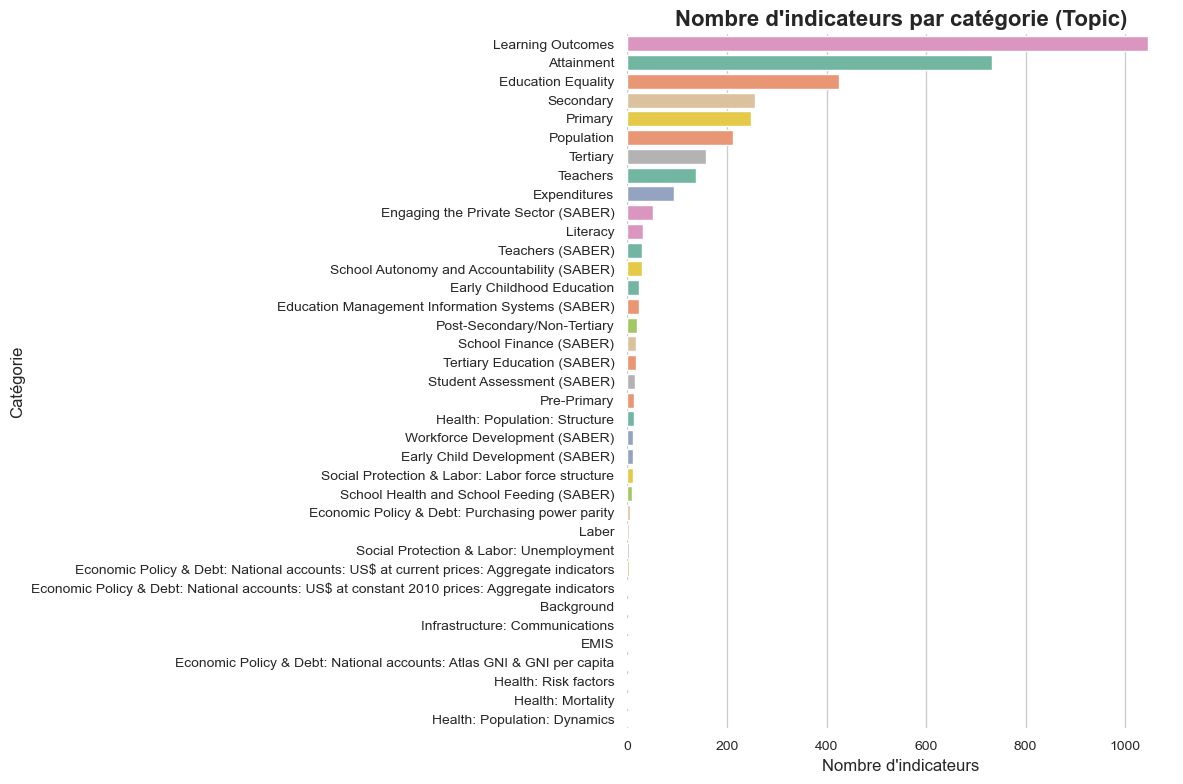

In [337]:
# Application du th√®me global
sns.set_theme(style="whitegrid")
# Taille de la figure
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=Series,
    y=category_col,
    hue=category_col,  
    order=Series[category_col].value_counts().index,
    palette="Set2",
    legend=False 
)

# Titres et labels
plt.title("Nombre d'indicateurs par cat√©gorie (Topic)", fontsize=16, weight='bold')
plt.xlabel("Nombre d'indicateurs", fontsize=12)
plt.ylabel("Cat√©gorie", fontsize=12)

# Esth√©tique
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

**S√©lection m√©tier**

- Choix de **dix grandes cat√©gories** pertinentes pour Academy qui seront stock√©s dans la variable `categories_pertinentes` :
  - `Education`
  - `Population`
  - `Science and Technology`
  - `Economic Policy & Debt`
  - `Infrastructure`
  - `Labor & Social Protection`
  - `Health`
  - `Social Development`
  - `Poverty`
  - `ICT`

In [338]:
# S√©lection des cat√©gories pertinentes pour academy (EdTech lyc√©e/universit√©)
categories_pertinentes = [
    'Education',
    'Population', 
    'Science and Technology',
    'Economic Policy & Debt',
    'Infrastructure',
    'Labor & Social Protection',      # emploi, acc√®s social
    'Health',                         # parfois li√© √† scolarisation
    'Social Development',             # acc√®s, √©galit√©, conditions
    'Poverty',                        # pouvoir d‚Äôachat ‚âà potentiel client
    'ICT',                            # pour Internet, tech & acc√®s num√©rique
]

- Filtrage du fichier `Series` pour ne garder que les indicateurs li√©s √† ces th√®mes.

In [339]:
print("Filtrage par cat√©gories pertinentes:")
print(f"Cat√©gories s√©lectionn√©es: {categories_pertinentes}")

# Filtrage des indicateurs par cat√©gories pertinentes
series_filtered = Series[Series[category_col].isin(categories_pertinentes)]
print(f"Nombre d'indicateurs apr√®s filtrage par cat√©gorie: {len(series_filtered)}")

# R√©cup√©ration des codes des indicateurs filtr√©s
indicateurs_codes = series_filtered['Series Code'].tolist()

Filtrage par cat√©gories pertinentes:
Cat√©gories s√©lectionn√©es: ['Education', 'Population', 'Science and Technology', 'Economic Policy & Debt', 'Infrastructure', 'Labor & Social Protection', 'Health', 'Social Development', 'Poverty', 'ICT']
Nombre d'indicateurs apr√®s filtrage par cat√©gorie: 213


**B) - Nettoyage des ann√©es du dataframe `Data`**
- Plage d'ann√©es disponible dans `Data` : de **1970 √† 2100**.
- Identification d'ann√©es futures (**2030 √† 2100**) contenant **aucune donn√©e** utile.
- Filtrage des ann√©es pour ne garder que celles **pertinentes** : **de 2000 √† 2025**.

In [340]:
# Filtrage du dataset Data pour ne garder que les indicateurs pertinentes
data_filtered = Data[Data['Indicator Code'].isin(indicateurs_codes)]
# Analyse des colonnes ann√©es dans le dataset Data
year_columns = [col for col in Data.columns if col.isdigit()]
print(f"Ann√©es disponibles: {min(year_columns)} √† {max(year_columns)}")
print(f"Nombre total d'ann√©es: {len(year_columns)}")
# Analyse des valeurs futures
current_year = 2025
future_years = [col for col in year_columns if int(col) > current_year]
if future_years:
    print(f"Ann√©es futures d√©tect√©es: {future_years}")
    print("Raison possible: projections d√©mographiques ou estimations")
    # V√©rifier si ces ann√©es futures contiennent des donn√©es
    future_data_count = data_filtered[future_years].notna().sum().sum()
    print(f"Nombre de valeurs non-nulles pour les ann√©es futures: {future_data_count}")
# Filtrage des ann√©es pertinentes (2000-2024 pour avoir des donn√©es r√©centes et historiques)
years_pertinentes = [col for col in year_columns if 2000 <= int(col) <= 2025]
print(f"Ann√©es s√©lectionn√©es pour l'analyse: {min(years_pertinentes)} √† {max(years_pertinentes)}")
print(f"Nombre d'ann√©es retenues: {len(years_pertinentes)}")

# Dataset final filtr√©
data_final = data_filtered[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + years_pertinentes]
print(f"Dimensions du dataset final: {data_final.shape}")

Ann√©es disponibles: 1970 √† 2100
Nombre total d'ann√©es: 65
Ann√©es futures d√©tect√©es: ['2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']
Raison possible: projections d√©mographiques ou estimations
Nombre de valeurs non-nulles pour les ann√©es futures: 0
Ann√©es s√©lectionn√©es pour l'analyse: 2000 √† 2025
Nombre d'ann√©es retenues: 20
Dimensions du dataset final: (46008, 24)


**R√©sultat**
- Un dataset r√©duit nomm√© `data_final`, avec uniquement :
  - Les pays valides
  - Les indicateurs m√©tier pertinents
  - Les ann√©es de 2000 √† 2025
  - Les ann√©es futures correspondent probablement √† des projections d√©mographiques ou estimations
-  **Dimensions finales : 48‚ÄØ990 lignes √ó 24 colonnes**

> Ce jeu de donn√©es r√©duit constitue une base propre et cibl√©e pour les analyses suivantes (qualit√© des donn√©es, s√©lection des meilleurs indicateurs).

**Visualisation du proportion d‚Äôindicateurs renseign√©s par ann√©e du dataframe `Data`**

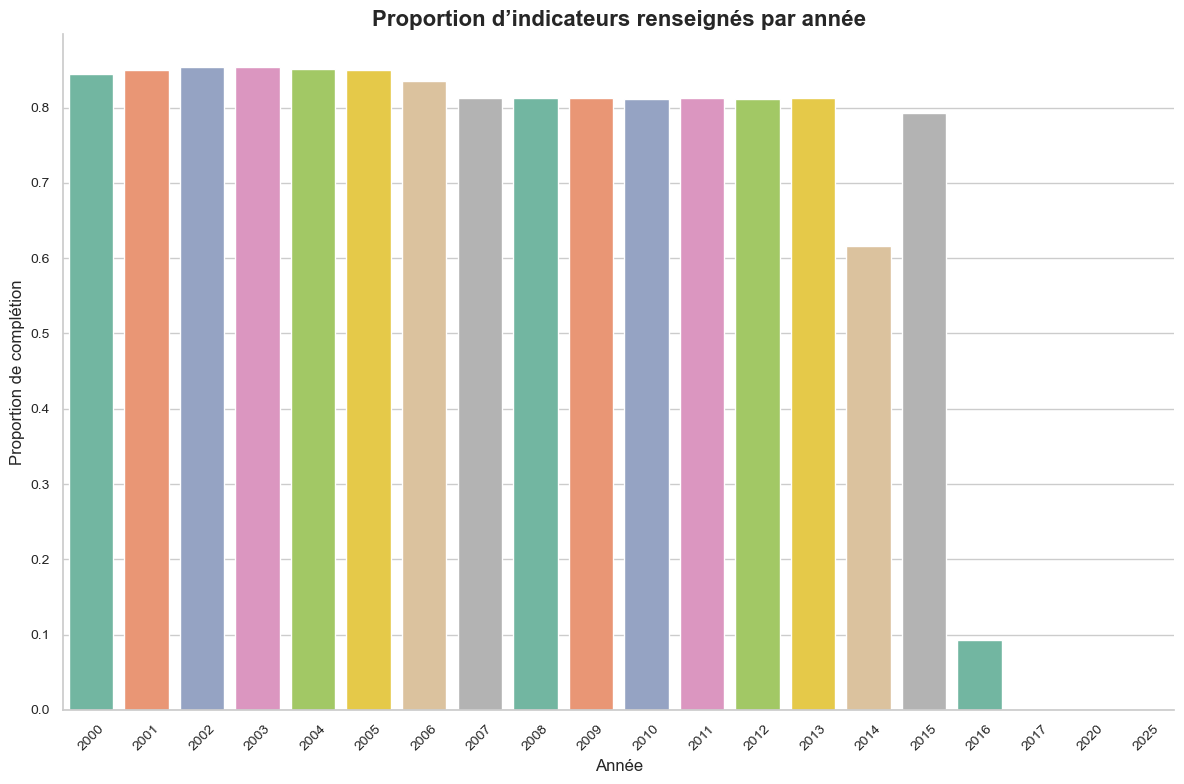

In [341]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Ajout d'un type float pour √™tre s√ªr que la proportion s‚Äôaffiche correctement
prop_year_df['Ann√©e'] = prop_year_df['Ann√©e'].astype(str)

ax = sns.barplot(
    data=prop_year_df.sort_values("Ann√©e"),
    x="Ann√©e",
    y="Proportion",
    hue="Ann√©e",         # pour palette sans warning
    palette="Set2",
    legend=False
)

plt.title("Proportion d‚Äôindicateurs renseign√©s par ann√©e", fontsize=16, weight='bold')
plt.xlabel("Ann√©e", fontsize=12)
plt.ylabel("Proportion de compl√©tion", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

### √âtape 2 : R√©duction du p√©rim√®tre en utilisant une approche data

Dans cette √©tape, nous appliquons une approche data pour s√©lectionner uniquement les **indicateurs les plus riches en donn√©es**, en compl√©ment de notre s√©lection m√©tier.

**1. Proportion de valeurs renseign√©es par ann√©e**
- Pour chaque ann√©e de 2000 √† 2025, nous avons mesur√© la proportion d‚Äôindicateurs renseign√©s.
- Les meilleures ann√©es tournent autour de **2002 √† 2006**, avec plus de **x % de compl√©tude**.

In [342]:
# Proportion d'indicateurs renseign√©s par ann√©e
prop_by_year = {}
for year in years_pertinentes:
    prop_by_year[year] = data_final[year].notna().sum() / len(data_final)

prop_year_df = pd.DataFrame(list(prop_by_year.items()), columns=['Ann√©e', 'Proportion'])
print("Meilleures ann√©es:")
display(prop_year_df.sort_values('Proportion', ascending=False))

Meilleures ann√©es:


Ann√©e  Proportion
2   2002    0.874239
3   2003    0.874196
4   2004    0.870544
5   2005    0.870218
1   2001    0.869392
0   2000    0.863915
6   2006    0.854634
9   2009    0.831747
7   2007    0.831486
8   2008    0.831486
11  2011    0.831160
13  2013    0.830769
10  2010    0.830595
12  2012    0.830551
15  2015    0.815228
14  2014    0.630151
16  2016    0.095462
17  2017    0.000000
18  2020    0.000000
19  2025    0.000000

**2. Proportion d‚Äôann√©es renseign√©es par indicateur**
- Nous avons mesur√©, pour chaque indicateur, la proportion d'ann√©es renseign√©es.
- Cela nous permet d‚Äôidentifier les indicateurs qui ont une couverture temporelle suffisante.

In [343]:
# Proportion d'ann√©es renseign√©es par indicateur
prop_by_indicator = {}
for idx, row in data_final.iterrows():
    indicator_code = row['Indicator Code']
    values_present = row[years_pertinentes].notna().sum()
    prop_by_indicator[indicator_code] = values_present / len(years_pertinentes)

**3. Nombre de pays renseign√©s par indicateur et par ann√©e**
- Pour chaque couple (indicateur, ann√©e), nous avons calcul√© le **nombre de pays avec une valeur disponible**.
- Cela permet d‚Äô√©valuer la densit√© r√©elle des donn√©es.

In [344]:
# Compter les pays par indicateur et par ann√©e
data_melted = data_final.melt(
    id_vars=['Country Code', 'Indicator Code'],
    value_vars=years_pertinentes,
    var_name='Year',
    value_name='Value'
)

# Calcul du nombre de pays avec des valeurs par indicateur et ann√©e
richesse_donnees = data_melted.groupby(['Indicator Code', 'Year'])['Value'].count().reset_index()
richesse_donnees.columns = ['Indicator Code', 'Year', 'Nb_Pays_Renseign√©s']
richesse_donnees.head()

Indicator Code  Year  Nb_Pays_Renseign√©s
0  SP.POP.0305.FE.UN  2000                 188
1  SP.POP.0305.FE.UN  2001                 189
2  SP.POP.0305.FE.UN  2002                 190
3  SP.POP.0305.FE.UN  2003                 190
4  SP.POP.0305.FE.UN  2004                 189

In [398]:
# Calcul de la moyenne de pays renseign√©s par indicateur
richesse_moyenne = richesse_donnees.groupby('Indicator Code')['Nb_Pays_Renseign√©s'].agg(['mean', 'max', 'min']).reset_index()
richesse_moyenne.columns = ['Indicator Code', 'Moyenne_Pays', 'Max_Pays', 'Min_Pays']
richesse_moyenne = richesse_moyenne.sort_values('Moyenne_Pays', ascending=False)

In [399]:
richesse_moyenne.head()

Indicator Code  Moyenne_Pays  Max_Pays  Min_Pays
196     SP.SEC.UTOT.IN        162.65       196         0
190     SP.SEC.LTOT.IN        162.55       195         0
193     SP.SEC.TOTL.IN        162.40       195         0
181     SP.PRE.TOTL.IN        162.35       195         0
195  SP.SEC.UTOT.FE.IN        161.90       195         0

**4. S√©lection finale**
- Nous avons s√©lectionn√© les **20 indicateurs les plus riches** (en nombre moyen de pays renseign√©s sur les ann√©es retenues).
- Cela nous garantit un socle solide pour des analyses comparatives entre pays.

In [400]:
# Ajout des noms des indicateurs
richesse_avec_noms = richesse_moyenne.merge(data_final[['Indicator Code', 'Indicator Name']].drop_duplicates(),on='Indicator Code')
print("Top 20 indicateurs les plus riches:")
display(richesse_avec_noms[['Indicator Code', 'Indicator Name', 'Moyenne_Pays']].head(20))

Top 20 indicateurs les plus riches:


Indicator Code                                     Indicator Name  \
0        SP.SEC.UTOT.IN  Population of the official age for upper secon...   
1        SP.SEC.LTOT.IN  Population of the official age for lower secon...   
2        SP.SEC.TOTL.IN  Population of the official age for secondary e...   
3        SP.PRE.TOTL.IN  Population of the official age for pre-primary...   
4     SP.SEC.UTOT.FE.IN  Population of the official age for upper secon...   
5     SP.SEC.UTOT.MA.IN  Population of the official age for upper secon...   
6     SP.SEC.LTOT.FE.IN  Population of the official age for lower secon...   
7     SP.SEC.LTOT.MA.IN  Population of the official age for lower secon...   
8     UIS.SAP.23.GPV.G1  Population of the official entrance age to sec...   
9     SP.SEC.TOTL.FE.IN  Population of the official age for secondary e...   
10    SP.SEC.TOTL.MA.IN  Population of the official age for secondary e...   
11    SP.PRE.TOTL.FE.IN  Population of the official age for pre-primary...   
12    SP.PRE.TOTL.MA.IN  Population of the official age for pre-primary...   
13       SP.PRM.TOTL.IN  Population of the official age for primary edu...   
14  UIS.SAP.23.GPV.G1.M  Population of the official entrance age to sec...   
15  UIS.SAP.23.GPV.G1.F  Population of the official entrance age to sec...   
16    SP.PRM.TOTL.FE.IN  Population of the official age for primary edu...   
17    SP.PRM.TOTL.MA.IN  Population of the official age for primary edu...   
18       SP.PRM.GRAD.TO  Population of the official age for the last gr...   
19         UIS.SAP.1.G1  Population of the official entrance age to pri...   

    Moyenne_Pays  
0         162.65  
1         162.55  
2         162.40  
3         162.35  
4         161.90  
5         161.90  
6         161.80  
7         161.80  
8         161.65  
9         161.65  
10        161.65  
11        161.60  
12        161.60  
13        161.10  
14        160.80  
15        160.80  
16        160.40  
17        160.40  
18        160.25  
19        159.75

**Visualisation du top 20 des indicateurs les plus renseign√©s du dataframe enrichi `richesse_avec_noms`**

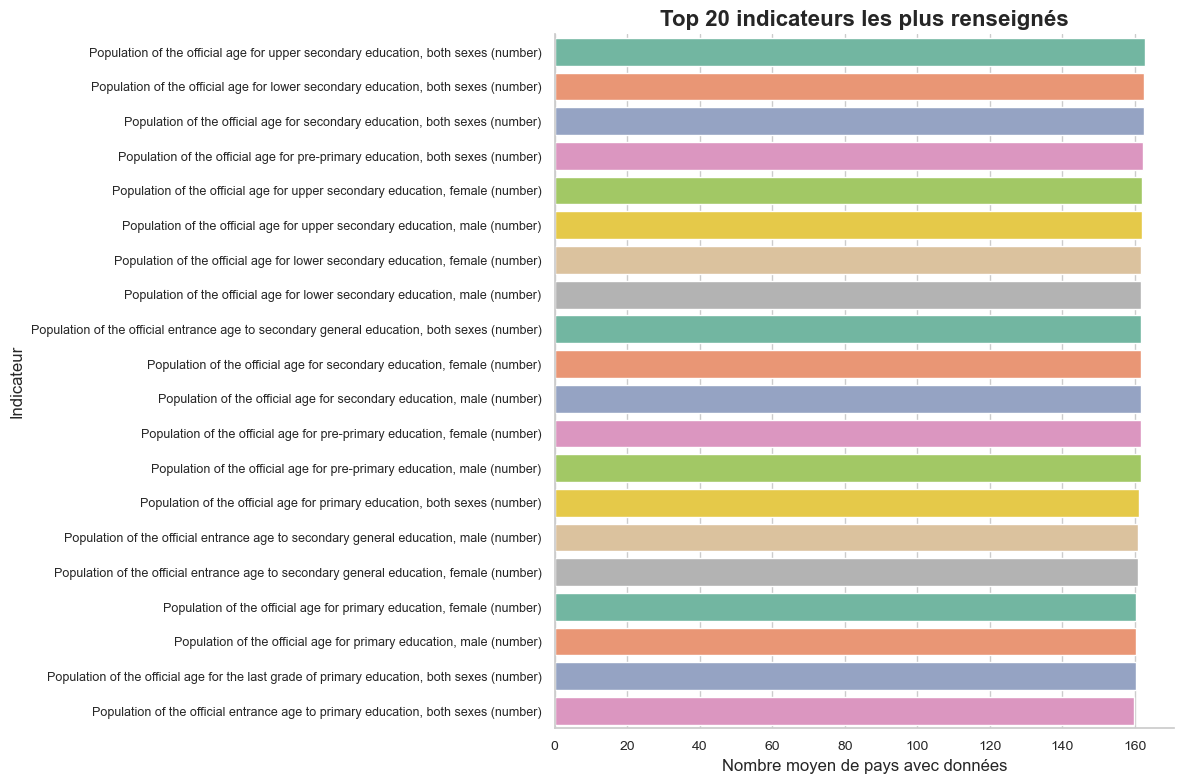

In [348]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=richesse_avec_noms.head(20),
    y="Indicator Name",
    x="Moyenne_Pays",
    hue="Indicator Name",
    palette="Set2",
    legend=False
)

plt.title("Top 20 indicateurs les plus renseign√©s", fontsize=16, weight='bold')
plt.xlabel("Nombre moyen de pays avec donn√©es", fontsize=12)
plt.ylabel("Indicateur", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
sns.despine()
plt.tight_layout()
plt.show()

In [401]:
# S√©lection des 20 meilleurs indicateurs
indicateurs_academy_final = richesse_avec_noms.head(20)['Indicator Code'].tolist()

#  Filtrage du dataset final
data_academy = data_final[data_final['Indicator Code'].isin(indicateurs_academy_final)]

print(f"Dataset academy final: {data_academy.shape}")
print(f"Pays: {data_academy['Country Code'].nunique()}")
print(f"Indicateurs: {data_academy['Indicator Code'].nunique()}")

Dataset academy final: (4320, 24)
Pays: 216
Indicateurs: 20


In [404]:
# Dataset final academy
data_academy = data_final[data_final['Indicator Code'].isin(indicateurs_academy_final)]

print(f"Dataset academy final: {data_academy.shape}")
print(f"Pays: {data_academy['Country Code'].nunique()}")
print(f"Indicateurs: {data_academy['Indicator Code'].nunique()}")

print("\nListe des indicateurs finaux:")
for i in indicateurs_academy_final:
    name = data_academy[data_academy['Indicator Code']==i]['Indicator Name'].iloc[0]
    print(f"- {i}: {name}")


Dataset academy final: (4320, 24)
Pays: 216
Indicateurs: 20

Liste des indicateurs finaux:
- SP.SEC.UTOT.IN: Population of the official age for upper secondary education, both sexes (number)
- SP.SEC.LTOT.IN: Population of the official age for lower secondary education, both sexes (number)
- SP.SEC.TOTL.IN: Population of the official age for secondary education, both sexes (number)
- SP.PRE.TOTL.IN: Population of the official age for pre-primary education, both sexes (number)
- SP.SEC.UTOT.FE.IN: Population of the official age for upper secondary education, female (number)
- SP.SEC.UTOT.MA.IN: Population of the official age for upper secondary education, male (number)
- SP.SEC.LTOT.FE.IN: Population of the official age for lower secondary education, female (number)
- SP.SEC.LTOT.MA.IN: Population of the official age for lower secondary education, male (number)
- UIS.SAP.23.GPV.G1: Population of the official entrance age to secondary general education, both sexes (number)
- SP.SEC.TOTL.

#### R√©sultat final
- **Dataset `data_academy` filtr√© :** 4‚ÄØ320 lignes √ó 24 colonnes  
- **Pays repr√©sent√©s :** 216  
- **Indicateurs retenus :** 20


### √âtape 3 : Consolidation des r√©sultats dans un dataframe agr√©ger par pays

Nous consolidons nos r√©sultats dans un dataframe agr√©g√©, qui permettra de comparer les pays selon les indicateurs s√©lectionn√©s.

In [409]:
# V√©rification du dataset de d√©part
print("Dataset de d√©part:")
print(f"- Shape: {data_academy.shape}")
print(f"- Pays uniques: {data_academy['Country Code'].nunique()}")
print(f"- Indicateurs: {data_academy['Indicator Code'].nunique()}")
print(f"- Ann√©es: {len(years_pertinentes)} ({min(years_pertinentes)}-{max(years_pertinentes)})")

Dataset de d√©part:
- Shape: (4320, 24)
- Pays uniques: 216
- Indicateurs: 20
- Ann√©es: 20 (2000-2025)


Formatage des donn√©es
- Le fichier `data_academy` est converti en format **long** : une ligne = un couple (pays, indicateur, ann√©e).
- Suppression des lignes sans valeur.

In [410]:
# Mise au format long (ann√©e = ligne)
data_long = data_academy.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    value_vars=years_pertinentes,
    var_name='Year',
    value_name='Value'
)

# Suppression des valeurs manquantes
data_long_clean = data_long.dropna(subset=['Value'])
print(f"Donn√©es avant nettoyage: {len(data_long):,} lignes")
print(f"Donn√©es apr√®s nettoyage: {len(data_long_clean):,} lignes")
print(f"Taux de remplissage global: {len(data_long_clean)/len(data_long)*100:.1f}%")

Donn√©es avant nettoyage: 86,400 lignes
Donn√©es apr√®s nettoyage: 64,580 lignes
Taux de remplissage global: 74.7%


#### V√©rification de la couverture temporelle
- Pour chaque couple (pays, indicateur), nous comptons le nombre d'ann√©es renseign√©es.
- R√©sultat :
  - Moyenne ‚âà **16,4 ann√©es disponibles** (sur 20),
  - Moins de **5 % des combinaisons** ont moins de 3 ann√©es renseign√©es ‚û§ **qualit√© jug√©e acceptable**.

In [356]:
# Analyse de la couverture temporelle (nb d'ann√©es par pays √ó indicateur)
couverture_temporelle = data_long_clean.groupby(['Country Code', 'Indicator Code']).size().reset_index(name='Nb_Ann√©es')
print(f"\nDistribution du nombre d'ann√©es par (pays, indicateur):")
print(couverture_temporelle['Nb_Ann√©es'].describe())

# Avertissement si trop de combinaisons peu renseign√©es
peu_annees = couverture_temporelle[couverture_temporelle['Nb_Ann√©es'] < 3]
pourcentage_peu_annees = len(peu_annees) / len(couverture_temporelle) * 100
print(f"\nCombinaisons avec < 3 ann√©es: {len(peu_annees)} ({pourcentage_peu_annees:.1f}%)")


Distribution du nombre d'ann√©es par (pays, indicateur):
count    3926.000000
mean       16.449312
std         1.938113
min         1.000000
25%        17.000000
50%        17.000000
75%        17.000000
max        17.000000
Name: Nb_Ann√©es, dtype: float64

Combinaisons avec < 3 ann√©es: 21 (0.5%)


#### Agr√©gation finale
- Nous utilisons `pivot_table()` pour agr√©ger les valeurs **par pays et indicateur** (moyenne sur les ann√©es disponibles).
- Le tableau final `df_aggrege` contient :
  - Une ligne par **pays**,
  - Une colonne par **indicateur**,
  - Valeurs moyennes liss√©es dans le temps.

In [386]:
# Agr√©gation par pays et indicateur : moyenne des ann√©es
df_aggrege = data_long_clean.pivot_table(
    index=['Country Code', 'Country Name'],
    columns='Indicator Code',
    values='Value',
    aggfunc='mean'
).reset_index()

# Taux de remplissage moyen
colonnes_indicateurs = [col for col in df_aggrege.columns if col not in ['Country Code', 'Country Name']]
taux_remplissage = df_aggrege[colonnes_indicateurs].notna().mean().mean()
print(f"\nDataframe agr√©g√© : {df_aggrege.shape}")
print(f"Taux de remplissage moyen : {taux_remplissage*100:.1f}%")


Dataframe agr√©g√© : (198, 22)
Taux de remplissage moyen : 99.1%


In [387]:
#Aper√ßu 
display(df_aggrege.head())

Indicator Code Country Code          Country Name  SP.PRE.TOTL.FE.IN  \
0                       ABW                 Aruba       1.345941e+03   
1                       AFG           Afghanistan       1.548204e+06   
2                       AGO                Angola       5.931535e+05   
3                       ALB               Albania       6.225359e+04   
4                       ARE  United Arab Emirates       6.359238e+04   

Indicator Code  SP.PRE.TOTL.IN  SP.PRE.TOTL.MA.IN  SP.PRM.GRAD.TO  \
0                 2.742353e+03       1.396412e+03     1478.411765   
1                 3.178587e+06       1.630383e+06   692767.500000   
2                 1.189072e+06       5.959181e+05   548237.117647   
3                 1.294335e+05       6.717994e+04    53902.235294   
4                 1.305951e+05       6.700269e+04    58851.375000   

Indicator Code  SP.PRM.TOTL.FE.IN  SP.PRM.TOTL.IN  SP.PRM.TOTL.MA.IN  \
0                    4.306471e+03    8.714706e+03       4.408235e+03   
1                    2.214142e+06    4.554592e+06       2.340449e+06   
2                    1.588960e+06    3.180823e+06       1.591864e+06   
3                    1.056762e+05    2.190763e+05       1.134001e+05   
4                    1.507336e+05    3.124974e+05       1.617638e+05   

Indicator Code  SP.SEC.LTOT.FE.IN  SP.SEC.LTOT.IN  SP.SEC.LTOT.MA.IN  \
0                     1470.411765    2.955706e+03        1485.294118   
1                   932351.312500    1.924085e+06      991733.750000   
2                   846471.882353    1.687903e+06      841431.294118   
3                   113028.823529    2.327251e+05      119696.294118   
4                   106898.687500    2.308328e+05      123934.125000   

Indicator Code  SP.SEC.TOTL.FE.IN  SP.SEC.TOTL.IN  SP.SEC.TOTL.MA.IN  \
0                    3.639176e+03    7.316294e+03       3.677118e+03   
1                    1.755195e+06    3.628039e+06       1.872844e+06   
2                    1.518136e+06    3.024640e+06       1.506504e+06   
3                    2.178890e+05    4.465026e+05       2.286136e+05   
4                    1.947061e+05    4.369602e+05       2.422541e+05   

Indicator Code  SP.SEC.UTOT.FE.IN  SP.SEC.UTOT.IN  SP.SEC.UTOT.MA.IN  \
0                     2168.764706    4.360588e+03        2191.823529   
1                   822843.937500    1.703954e+06      881110.312500   
2                   671663.882353    1.336737e+06      665072.882353   
3                   104860.176471    2.137775e+05      108917.294118   
4                    87807.437500    2.061274e+05      118319.937500   

Indicator Code   UIS.SAP.1.G1  UIS.SAP.23.GPV.G1  UIS.SAP.23.GPV.G1.F  \
0                 1411.764706        1479.235294           735.705882   
1               835487.176471      680217.235294        329909.529412   
2               654423.294118      526787.411765        263834.647059   
3                46568.411765       55892.411765         27073.647059   
4                64531.705882                NaN                  NaN   

Indicator Code  UIS.SAP.23.GPV.G1.M  
0                        743.529412  
1                     350307.705882  
2                     262952.764706  
3                      28818.764706  
4                               NaN

#### Analyse du r√©sultat
- **Taux de remplissage moyen :** sup √† 90 % selon les indicateurs.
- Visualisation des pays les plus / moins renseign√©s.
- Calculs statistiques par indicateur : moyenne, √©cart-type, min/max.

In [411]:
df_aggrege['Score_Moyen'] = df_aggrege[colonnes_indicateurs].mean(axis=1)

In [412]:
# Statistiques descriptives
stats_indicateurs = df_aggrege[colonnes_indicateurs].describe()
display(stats_indicateurs.round(2))

Indicator Code  SP.PRE.TOTL.FE.IN  SP.PRE.TOTL.IN  SP.PRE.TOTL.MA.IN  \
count                      197.00          198.00             197.00   
mean                    824563.68      1699828.74          883888.86   
std                    3104498.84      6557771.88         3469428.38   
min                        155.00          328.00             173.00   
25%                      32318.53        65092.72           34345.53   
50%                     172051.24       344301.65          174483.06   
75%                     638017.06      1300703.06          676629.00   
max                   36167955.25     76412433.00        40244479.50   

Indicator Code  SP.PRM.GRAD.TO  SP.PRM.TOTL.FE.IN  SP.PRM.TOTL.IN  \
count                   196.00             196.00    1.970000e+02   
mean                 633282.68         1688812.40    3.472136e+06   
std                 2316397.69         5699366.58    1.199960e+07   
min                     231.35             679.06    1.419240e+03   
25%                   19959.79           58957.99    1.154944e+05   
50%                  114484.57          326016.03    6.502387e+05   
75%                  491624.26         1301171.74    2.593278e+06   
max                24649087.00        59100805.00    1.247162e+08   

Indicator Code  SP.PRM.TOTL.MA.IN  SP.SEC.LTOT.FE.IN  SP.SEC.LTOT.IN  \
count                      196.00             196.00          197.00   
mean                   1801022.46          991511.99      2033914.86   
std                    6329370.59         3393290.08      7104524.50   
min                        740.18             349.00          733.00   
25%                      61681.28           37665.22        74944.76   
50%                     331989.15          194939.97       391645.29   
75%                    1345285.46          797001.73      1609435.94   
max                   65615375.50        34682729.38     72928920.50   

Indicator Code  SP.SEC.LTOT.MA.IN  SP.SEC.TOTL.FE.IN  SP.SEC.TOTL.IN  \
count                      196.00             196.00    1.970000e+02   
mean                   1052774.11         1976693.09    4.053795e+06   
std                    3728284.26         7375062.96    1.541719e+07   
min                        384.00             621.76    1.288470e+03   
25%                      38942.60           73746.56    1.459651e+05   
50%                     197955.91          371774.57    7.529918e+05   
75%                     816619.57         1497534.50    3.007500e+06   
max                   38246191.75        79722838.00    1.673205e+08   

Indicator Code  SP.SEC.TOTL.MA.IN  SP.SEC.UTOT.FE.IN  SP.SEC.UTOT.IN  \
count                      196.00             196.00          197.00   
mean                   2097774.97          985177.42      2019883.70   
std                    8079379.00         4006650.54      8363110.04   
min                        666.71             198.71          408.71   
25%                      75149.59           38036.94        68802.88   
50%                     381837.97          172271.31       352980.88   
75%                    1507862.24          636666.63      1280923.25   
max                   87597620.00        45040107.75     94391536.00   

Indicator Code  SP.SEC.UTOT.MA.IN  UIS.SAP.1.G1  UIS.SAP.23.GPV.G1  \
count                      196.00        196.00             196.00   
mean                   1045007.96     640812.60          634733.95   
std                    4376827.96    2255685.14         2337578.67   
min                        210.00        239.65             227.06   
25%                      38279.97      25150.69           23553.15   
50%                     180466.24     119080.29          113788.03   
75%                     650282.36     519219.31          481806.72   
max                   49351429.50   25231442.59        24543084.35   

Indicator Code  UIS.SAP.23.GPV.G1.F  UIS.SAP.23.GPV.G1.M  
count                        195.00               195.00  
mean                      307572.

In [413]:
# Analyse des pays selon le nombre d'indicateurs renseign√©s
df_aggrege['Nb_Indicateurs_Renseignes'] = df_aggrege[colonnes_indicateurs].notna().sum(axis=1)

top_pays = df_aggrege.sort_values(
    by=['Nb_Indicateurs_Renseignes', 'Score_Moyen', 'Country Name'],
    ascending=[False, False, False]
)[['Country Name', 'Nb_Indicateurs_Renseignes', 'Score_Moyen']].head(10)
display(top_pays)

Indicator Code   Country Name  Nb_Indicateurs_Renseignes   Score_Moyen
81                      India                         20  5.852529e+07
33                      China                         20  4.374714e+07
80                  Indonesia                         20  9.898843e+06
186             United States                         20  9.494954e+06
138                  Pakistan                         20  8.788692e+06
54                  Euro area                         20  8.746416e+06
24                     Brazil                         20  7.751763e+06
15                 Bangladesh                         20  7.727269e+06
130                   Nigeria                         20  7.673249e+06
115                    Mexico                         20  5.169277e+06

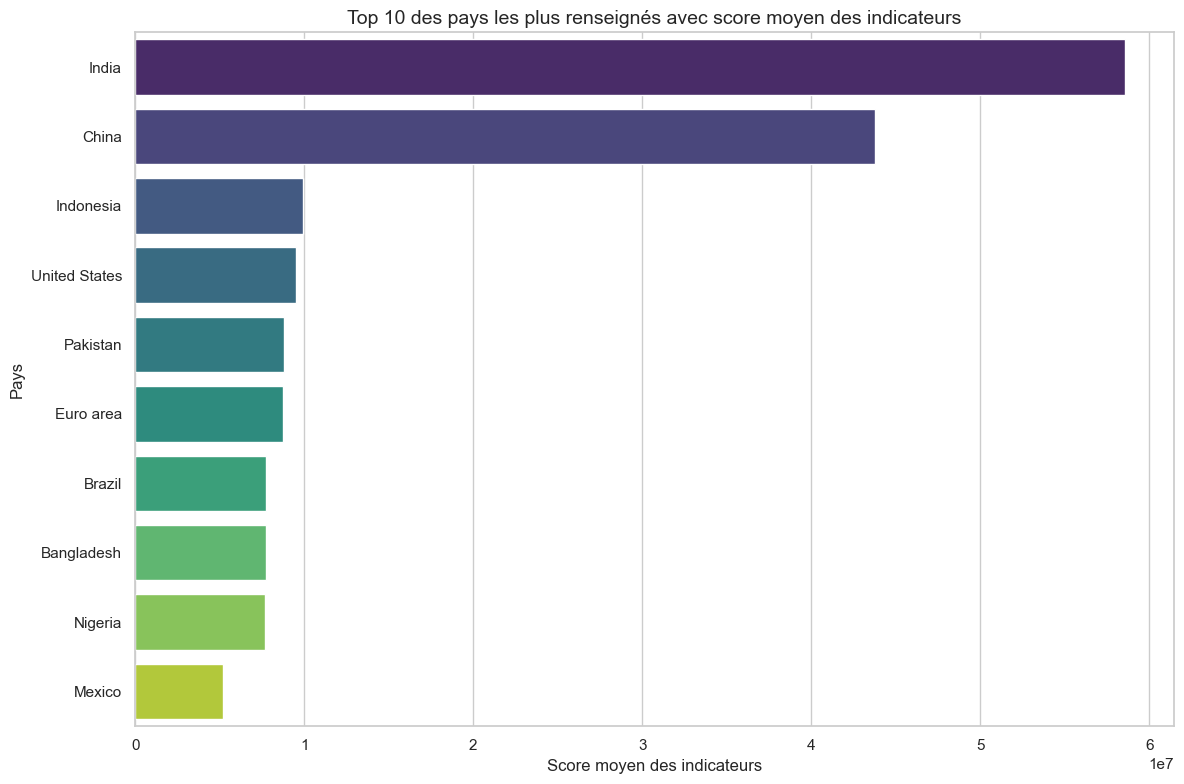

In [393]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y='Country Name',
    x='Score_Moyen',
    data=top_pays,
    hue='Country Name',       
    dodge=False,              #
    palette='viridis',
    legend=False             
)

plt.title("Top 10 des pays les plus renseign√©s avec score moyen des indicateurs", fontsize=14)
plt.xlabel("Score moyen des indicateurs")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()

In [394]:
bottom_pays = df_aggrege.sort_values(
    by=['Nb_Indicateurs_Renseignes','Score_Moyen', 'Country Name'],
    ascending=[True, True, True]
).head(10)[['Country Name', 'Nb_Indicateurs_Renseignes', 'Score_Moyen']]

print("\nPays avec le moins d'indicateurs renseign√©s:")
display(bottom_pays)

# Suppression colonne temporaire
df_aggrege = df_aggrege.drop('Nb_Indicateurs_Renseignes', axis=1)


Pays avec le moins d'indicateurs renseign√©s:


Indicator Code            Country Name  Nb_Indicateurs_Renseignes  \
190             British Virgin Islands                          6   
19              Bosnia and Herzegovina                          7   
4                 United Arab Emirates                         17   
127                           Malaysia                         18   
17                             Bahrain                         19   
82                             Ireland                         19   
135                              Nauru                         20   
181                             Tuvalu                         20   
67                           Gibraltar                         20   
142                              Palau                         20   

Indicator Code   Score_Moyen  
190             1.389344e+03  
19              5.092774e+04  
4               1.622005e+05  
127             1.382699e+06  
17              3.386671e+04  
82              1.262147e+05  
135             5.339618e+02  
181             5.564118e+02  
67              6.116500e+02  
142             6.995875e+02

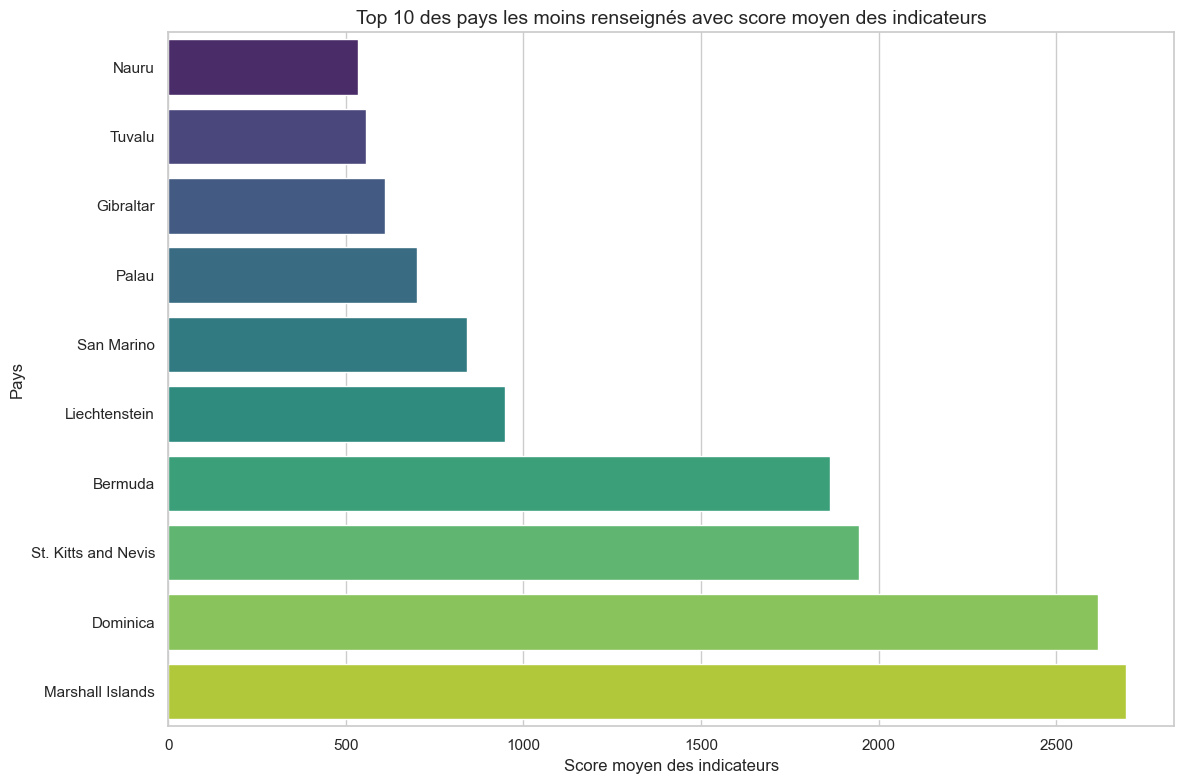

In [385]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y='Country Name',
    x='Score_Moyen',
    data=bottom_pays,
    hue='Country Name',       
    dodge=False,              
    palette='viridis',
    legend=False             
)

plt.title("Top 10 des pays les moins renseign√©s avec le score moyen des indicateurs", fontsize=14)
plt.xlabel("Score moyen des indicateurs")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()

### Synth√®se finale ‚Äì Analyse exploratoire pour expansion internationale  
**Projet : √âtude du potentiel client via les donn√©es de la Banque mondiale**  

---

## üéØ Objectif de la mission

Explorer les donn√©es √©ducation/population de la Banque mondiale pour :
- Identifier les pays √† fort potentiel pour les services EdTech d‚ÄôAcademy (niveau lyc√©e/universit√©),
- √âvaluer la qualit√©, la couverture et la richesse des donn√©es,
- Produire un p√©rim√®tre r√©duit et exploitable d‚Äôindicateurs-cl√©s,
- Construire un classement utile √† la priorisation de l‚Äôexpansion g√©ographique.

---

## üõ†Ô∏è √âtapes r√©alis√©es

### 1. üîç Nettoyage et structuration
- 5 jeux de donn√©es analys√©s.
- Suppression des faux pays et r√©gions agr√©g√©es (ex. "World", "Euro area", "Sub-Saharan Africa").
- Suppression des colonnes inutilisables et standardisation des ann√©es (2000 √† 2025).

### 2. üß† S√©lection m√©tier des indicateurs
- Cat√©gories retenues : *Education*, *Population*, *Science and Technology*, *Infrastructure*, *Economic Policy & Debt*.
- R√©duction √† 20 indicateurs directement li√©s √† la population en √¢ge scolaire, r√©partis par sexe et niveau.

### 3. üìä R√©duction par approche data
- Filtrage des indicateurs ayant une bonne couverture temporelle (proportion √©lev√©e de donn√©es renseign√©es).
- Suppression des ann√©es futures sans donn√©es effectives (2030+).
- S√©lection finale de 20 indicateurs pertinents.

### 4. üåç Agr√©gation des donn√©es par pays
- Calcul du nombre d‚Äôindicateurs renseign√©s par pays.
- Calcul d‚Äôun score moyen par pays (moyenne des valeurs disponibles).
- Tri multicrit√®re : compl√©tude ‚Üí score ‚Üí nom du pays.

---

## üåü R√©sultat cl√© : pays √† fort potentiel Academy

Les pays ressortant comme les plus pertinents combinent :
- Une excellente couverture de donn√©es (20/20 indicateurs),
- Une population massive en √¢ge d‚Äô√™tre scolaris√©e,
- Un score moyen √©lev√© sur les indicateurs √©ducatifs s√©lectionn√©s.

> Parmi eux : **Inde, Chine, Indon√©sie, √âtats-Unis, Pakistan, Br√©sil, Bangladesh, Nigeria, Mexique**, etc.

---

## ‚úÖ Recommandations

1. Prioriser l‚Äôanalyse strat√©gique et le go-to-market dans ces pays.
2. Compl√©ter l‚Äôanalyse avec des indicateurs secondaires (connectivit√©, d√©penses √©ducation, scolarisation r√©elle).
3. Affiner la liste des faux pays au fil du temps.
4. Utiliser la structure actuelle comme base pour int√©grer de nouveaux indicateurs m√©tier.

---
